# 1- Import library

In [1]:
import numpy as np
from tensorflow.keras import Sequential

#for visualization
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
# read image path
import pathlib

# for image processing
from keras.preprocessing.image import ImageDataGenerator

#for model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras

# 2- Read Dataset

In [2]:
# read data path data
df_path = pathlib.Path('C:/Users/hp/Downloads/Rice_Image_Dataset')

In [3]:
#return files / folders
arborio = list(df_path.glob('Arborio/*'))[:1000]
basmati = list(df_path.glob('Basmati/*'))[:1000]
ipsala = list(df_path.glob('Ipsala/*'))[:1000]
jasmine = list(df_path.glob('Jasmine/*'))[:1000]
karacadag = list(df_path.glob('Karacadag/*'))[:1000]

In [4]:
# Dictionay for folders names 
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag' : karacadag
}

In [5]:
# create dictionary for labels names
rice_labels = {
    0: 'arborio',
    1: 'basmati',
    2: 'ipsala',
    3: 'jasmine',
    4: 'karacadag'
}

# 3- Visualize sample from every class

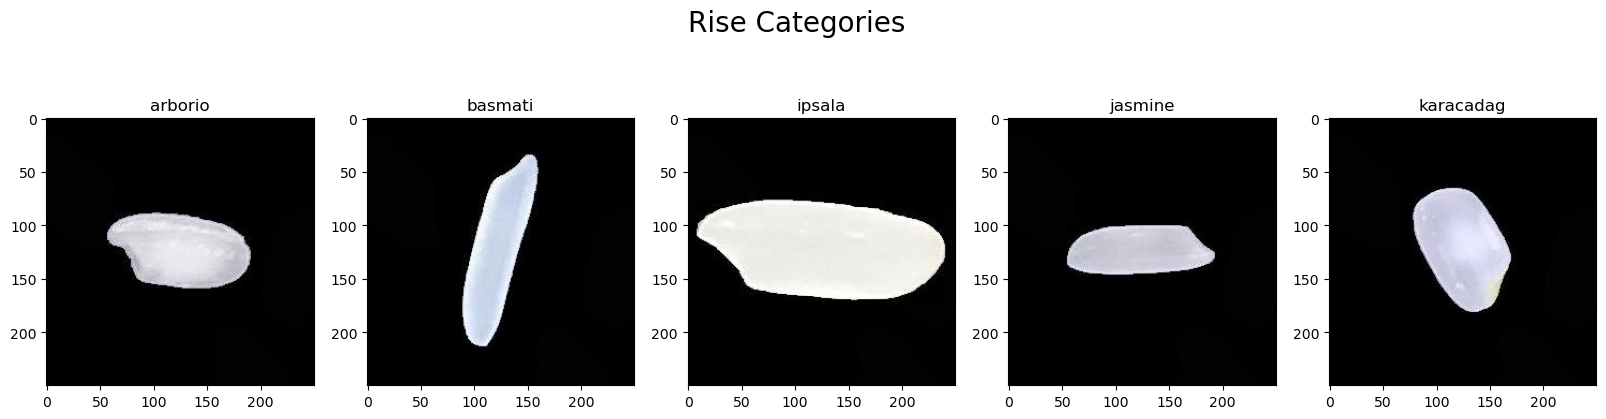

In [6]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,5))
fig.suptitle("Rise Categories" , fontsize = 20)

# read ine image from every folder
img_arborio = img.imread(arborio[0])
img_basmati = img.imread(basmati[0])
img_ipsala = img.imread(ipsala[0])
img_jasmine = img.imread(jasmine[0])
img_karacadag = img.imread(karacadag[0])

for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)
    
#show 5 images in subplots
ax[0].imshow(img_arborio)
ax[1].imshow(img_basmati)
ax[2].imshow(img_ipsala)
ax[3].imshow(img_jasmine)
ax[4].imshow(img_karacadag)

# 4- Data Preprocessing

In [7]:
# 1- train fata --. scale , validation split
data_generator = ImageDataGenerator(rescale = 1./255,
                                         validation_split =0.2)

In [8]:
#splite data --> train and test --> resize , shuffle , batch_size
train_data = data_generator.flow_from_directory('C:/Users/hp/Downloads/Rice_Image_Dataset',
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     shuffle = True,
                                                     subset = 'training')



Found 60000 images belonging to 5 classes.


In [9]:
test_data_generator = ImageDataGenerator(rescale =1./255)
test_data = data_generator.flow_from_directory('C:/Users/hp/Downloads/Rice_Image_Dataset',
                                                     target_size = (224,224),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = True,
                                                     subset = 'validation')



Found 15000 images belonging to 5 classes.


# 5- Model Building

In [10]:
model = Sequential()

# inputlayer
model.add(tf.keras.layers.Flatten())

#hidden layers
model.add(tf.keras.layers.Dense(128, activation =tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation =tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(64, activation =tf.keras.activations.relu))

#output layer
model.add(tf.keras.layers.Dense(5, activation =tf.keras.activations.softmax))

In [11]:
# define callback to avoid overfittng
early_stopping = keras.callbacks.EarlyStopping(patience=5) #set up callbacks

# 6- Compile & Fit Model

In [12]:
model.compile(optimizer ='adam',
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [13]:
model_history = model.fit(train_data , validation_data = test_data , epochs = 10 , callbacks = early_stopping)

Epoch 1/10
1875/1875 [==============================] - 512s 272ms/step - loss: 0.2111 - accuracy: 0.9356 - val_loss: 0.1737 - val_accuracy: 0.9466
Epoch 2/10
1875/1875 [==============================] - 1200s 640ms/step - loss: 0.1052 - accuracy: 0.9654 - val_loss: 0.0703 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 520s 277ms/step - loss: 0.0807 - accuracy: 0.9736 - val_loss: 0.0824 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 587s 313ms/step - loss: 0.0722 - accuracy: 0.9759 - val_loss: 0.0763 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 525s 280ms/step - loss: 0.0623 - accuracy: 0.9794 - val_loss: 0.1472 - val_accuracy: 0.9515
Epoch 6/10
1875/1875 [==============================] - 1565s 835ms/step - loss: 0.0540 - accuracy: 0.9821 - val_loss: 0.0842 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 521s 278ms/step - loss: 0.0536 - accuracy: 0.9826 - va

# 7- Model evaluation

In [14]:
#model prediction
y_pred = model.predict(test_data)

15000/15000 [==============================] - 661s 44ms/step


In [15]:
#take the argmax for the predicted value
y_pred = np.argmax(y_pred , axis =1)

In [16]:
train_accuracy = model.evaluate(train_data)

1875/1875 [==============================] - 114s 61ms/step - loss: 0.0573 - accuracy: 0.9819


In [17]:
test_accuracy = model.evaluate(test_data)

15000/15000 [==============================] - 121s 8ms/step - loss: 0.0725 - accuracy: 0.9784


# 8- Visualize Model History

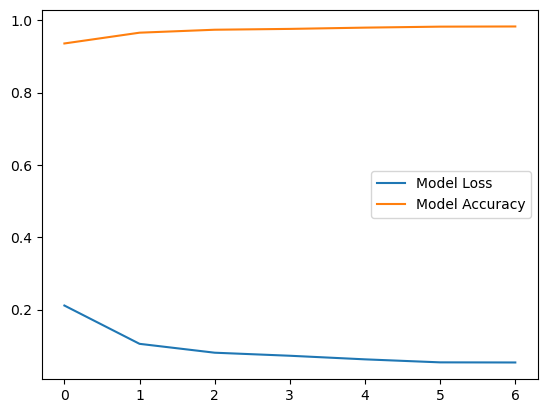

In [18]:
plt.plot(model_history.history['loss'], label ='Model Loss')
plt.plot(model_history.history['accuracy'], label ='Model Accuracy')
plt.legend()
plt.show()

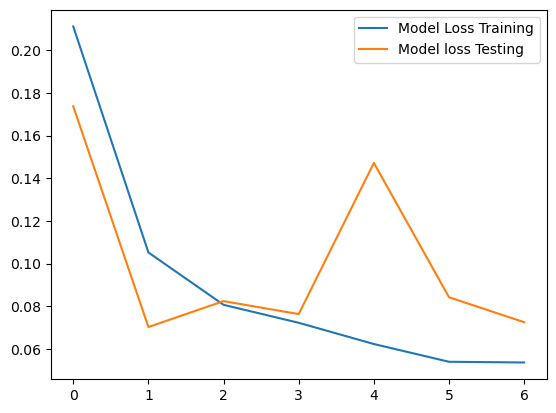

In [19]:
plt.plot(model_history.history['loss'], label ='Model Loss Training')
plt.plot(model_history.history['val_loss'], label ='Model loss Testing')
plt.legend()
plt.show()

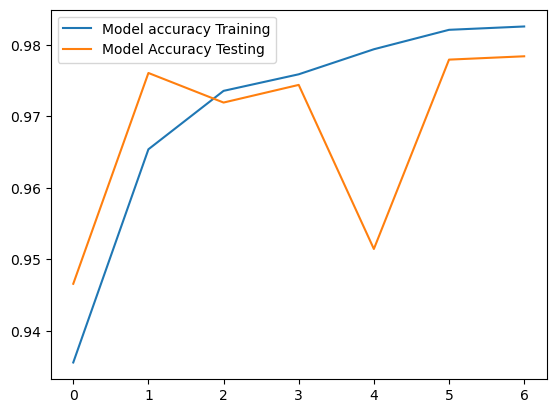

In [20]:
plt.plot(model_history.history['accuracy'], label ='Model accuracy Training')
plt.plot(model_history.history['val_accuracy'], label ='Model Accuracy Testing')
plt.legend()
plt.show()